# Securing the Future: Data-Driven Solutions to Reduce Child and Infant Mortality in Africa

Objective
The primary objective of this analysis is to utilize the provided datasets to uncover patterns, correlations, and key drivers of child and infant mortality in African countries.

Data Source
Link to the dataset: https://drive.google.com/file/d/1myW9sMtrkFT11kmtS8w5_Mwc_DlyWv6H/view

# 1. Data Preparation and Pre-processing

In [1]:
# Loading of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Datasets
youth_mortality_rate = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\youth-mortality-rate.csv')
infant_deaths = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\number-of-infant-deaths-unwpp.csv')
country_income_child_mortality = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\child-mortality-by-income-level-of-country.csv')
death_causes_distribution = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\Distribution of Causes of Death among Children Aged less than 5 years.csv')
region_maternal_deaths = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\number-of-maternal-deaths-by-region.csv')
staff_births_attended = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\births-attended-by-health-staff-sdgs.csv')
vaccination_coverage = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\global-vaccination-coverage.csv')
health_protection_coverage = pd.read_csv(r'C:\Users\samyu\Downloads\Infant Mortality Dataset\health-protection-coverage.csv')

In [3]:
# Get general information about youth mortality rate dataset
youth_mortality_rate.head(5)

,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777
2,Afghanistan,AFG,1979,28.479010
3,Afghanistan,AFG,1980,27.649078
4,Afghanistan,AFG,1981,26.834482


In [4]:
youth_mortality_rate_info = youth_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10515 entries, 0 to 10514
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        10515 non-null  object 
 1   Code                          9492 non-null   object 
 2   Year                          10515 non-null  int64  
 3   Under-fifteen mortality rate  10515 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 328.7+ KB


In [5]:
# Get the number of rows and columns
num_rows = youth_mortality_rate.shape[0]
num_columns = youth_mortality_rate.shape[1]

# Calculate the total number of entries
total_entries = num_rows * num_columns

# Check for missing values in the  yield_data dataframe
missing_values = youth_mortality_rate.isnull().sum()


print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print(f"Total Entries: {total_entries}")
print(f'missing_values: {missing_values}')

Number of Rows: 10515
Number of Columns: 4
Total Entries: 42060
missing_values: Entity                             0
Code                            1023
Year                               0
Under-fifteen mortality rate       0
dtype: int64


In [6]:
# Drop code columns with missing values
youth_mortality_rate.drop(columns=['Code'], inplace=True)

In [7]:
print(youth_mortality_rate.head())

        Entity  Year  Under-fifteen mortality rate
0  Afghanistan  1977                     30.110573
1  Afghanistan  1978                     29.290777
2  Afghanistan  1979                     28.479010
3  Afghanistan  1980                     27.649078
4  Afghanistan  1981                     26.834482


In [8]:
# Rename the columns heads in the youth_mortality_rate dataframe for consistency 
youth_mortality_rate.rename(columns={'Entity': 'entity', 'Year' : 'year','Under-fifteen mortality rate' : 'u_15_mortality_rate'}, inplace=True)

In [9]:
youth_mortality_rate.head()

,entity,year,u_15_mortality_rate
0,Afghanistan,1977,30.110573
1,Afghanistan,1978,29.290777
2,Afghanistan,1979,28.479010
3,Afghanistan,1980,27.649078
4,Afghanistan,1981,26.834482


In [10]:
# Get general information about Number of infant deaths dataset
infant_deaths.head(5)

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0
2,Afghanistan,AFG,1952,108140.0
3,Afghanistan,AFG,1953,108248.0
4,Afghanistan,AFG,1954,108241.0


In [11]:
infant_death_info = infant_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           18944 non-null  object 
 1   Code                                             17612 non-null  object 
 2   Year                                             18944 non-null  int64  
 3   Deaths - Sex: all - Age: 0 - Variant: estimates  18944 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 592.1+ KB


In [12]:
# Drop code columns with missing values infant_death table
infant_deaths.drop(columns=['Code'], inplace=True)

In [13]:
print(infant_deaths.head(4))

        Entity  Year  Deaths - Sex: all - Age: 0 - Variant: estimates
0  Afghanistan  1950                                         109220.0
1  Afghanistan  1951                                         107971.0
2  Afghanistan  1952                                         108140.0
3  Afghanistan  1953                                         108248.0


In [14]:
# Rename the columns heads in the infant_deaths dataframe for consistency 
infant_deaths.rename(columns={'Entity': 'entity', 'Year' : 'year','Deaths - Sex: all - Age: 0 - Variant: estimates' : 'death_sex:all_age0_estimates'}, inplace=True)

In [15]:
infant_deaths.head(5)

,entity,year,death_sex:all_age0_estimates
0,Afghanistan,1950,109220.0
1,Afghanistan,1951,107971.0
2,Afghanistan,1952,108140.0
3,Afghanistan,1953,108248.0
4,Afghanistan,1954,108241.0


In [16]:
# Get general information about child-mortality-by-income-level-of-country dataset
country_income_child_mortality.head(5)

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


In [17]:
country_income_child_mortality_info = country_income_child_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 4 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   Entity                                                                                                                                        14200 non-null  object 
 1   Code                                                                                                                                          12842 non-null  object 
 2   Year                                                                                                                                          14200 non-null  int64  
 3   Observation value - Indicator: U

In [18]:
# Drop code columns with missing values child-mortality-by-income-level-of-country table
country_income_child_mortality.drop(columns=['Code'], inplace=True)
print(country_income_child_mortality.head())

        Entity  Year  \
0  Afghanistan  1957   
1  Afghanistan  1958   
2  Afghanistan  1959   
3  Afghanistan  1960   
4  Afghanistan  1961   

   Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births  
0                                          37.245758                                                                                             
1                                          36.626625                                                                                             
2                                          36.043480                                                                                             
3                                          35.459850                                                                                             
4                                          34.894880                                                                         

In [19]:
# Rename the columns heads in the country_income_child_mortality dataframe for consistency 
country_income_child_mortality.rename(columns={'Entity': 'entity', 'Year' : 'year','Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births' : 'u5_mortality_rate_observation_value(deaths_per_100_live_ births)'}, inplace=True)

In [20]:
country_income_child_mortality.head()

,entity,year,u5_mortality_rate_observation_value(deaths_per_100_live_ births)
0,Afghanistan,1957,37.245758
1,Afghanistan,1958,36.626625
2,Afghanistan,1959,36.043480
3,Afghanistan,1960,35.459850
4,Afghanistan,1961,34.894880


In [21]:
# Get general information about Distribution of Causes of Death among Children Aged less than 5 years dataset
death_causes_distribution.head(5)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
2,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
3,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
4,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z


In [22]:
death_causes_distribution_info = death_causes_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146664 entries, 0 to 146663
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IndicatorCode               146664 non-null  object 
 1   Indicator                   146664 non-null  object 
 2   ValueType                   146664 non-null  object 
 3   ParentLocationCode          146664 non-null  object 
 4   ParentLocation              146664 non-null  object 
 5   Location type               146664 non-null  object 
 6   SpatialDimValueCode         146664 non-null  object 
 7   Location                    146664 non-null  object 
 8   Period type                 146664 non-null  object 
 9   Period                      146664 non-null  int64  
 10  IsLatestYear                146664 non-null  bool   
 11  Dim1 type                   146664 non-null  object 
 12  Dim1                        146664 non-null  object 
 13  Dim1ValueCode 

In [23]:
# Check for missing values in the  death_causes_distribution dataframe
missing_values = death_causes_distribution.isnull().sum()
print(f'missing_values: {missing_values}')

missing_values: IndicatorCode                      0
Indicator                          0
ValueType                          0
ParentLocationCode                 0
ParentLocation                     0
Location type                      0
SpatialDimValueCode                0
Location                           0
Period type                        0
Period                             0
IsLatestYear                       0
Dim1 type                          0
Dim1                               0
Dim1ValueCode                      0
Dim2 type                          0
Dim2                               0
Dim2ValueCode                      0
Dim3 type                     146664
Dim3                          146664
Dim3ValueCode                 146664
DataSourceDimValueCode        146664
DataSource                    146664
FactValueNumericPrefix        146664
FactValueNumeric                   0
FactValueUoM                  146664
FactValueNumericLowPrefix     146664
FactValueNumericLow   

In [24]:
# Drop code columns with missing values in Distribution of Causes of Death among Children Aged less than 5 years table
death_causes_distribution.drop(columns=['Dim3 type','Dim3','Dim3ValueCode','DataSourceDimValueCode','DataSource','FactValueNumericPrefix','FactValueUoM','FactValueNumericLowPrefix','FactValueNumericLow','FactValueNumericHighPrefix','FactValueNumericHigh','FactValueTranslationID','FactComments'], inplace=True)
death_causes_distribution.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,FactValueNumeric,Value,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.0006,0.0,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,0.0110,0.0,EN,2018-11-26T23:00:00.000Z
2,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,HIV/AIDS,CHILDCAUSE_CH2,0.0000,0.0,EN,2018-11-26T23:00:00.000Z
3,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Diarrhoeal diseases,CHILDCAUSE_CH3,0.0110,0.0,EN,2018-11-26T23:00:00.000Z
4,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Tetanus,CHILDCAUSE_CH5,0.0270,0.0,EN,2018-11-26T23:00:00.000Z


In [25]:
death_causes_distribution.to_csv('death_causes_distribution.csv', index=False)
print("Cleaned dataset saved as 'death_causes_distribution.csv'")

Cleaned dataset saved as 'death_causes_distribution.csv'


In [26]:
# Drop irrelevant columns in Distribution of Causes of Death among Children Aged less than 5 years table
death_causes_distribution.drop(columns=['IndicatorCode','Indicator','ParentLocationCode','Location type','SpatialDimValueCode','Period type','Dim1 type','Dim2 type','Language','DateModified'], inplace=True)
death_causes_distribution.head()

,ValueType,ParentLocation,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,Dim2,Dim2ValueCode,FactValueNumeric,Value
0,numeric,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Other noncommunicable diseases,CHILDCAUSE_CH16,0.0006,0.0
1,numeric,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Injuries,CHILDCAUSE_CH17,0.0110,0.0
2,numeric,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,HIV/AIDS,CHILDCAUSE_CH2,0.0000,0.0
3,numeric,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Diarrhoeal diseases,CHILDCAUSE_CH3,0.0110,0.0
4,numeric,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Tetanus,CHILDCAUSE_CH5,0.0270,0.0


In [27]:
# Rename some of the  death_causes_distribution columns for consistency 
death_causes_distribution.rename(columns={'ParentLocation': 'parent_entity', 'Location' : 'entity','Period' : 'year','IsLatestYear' : 'is_latest_year', 'Dim1' : 'age_group', 'Dim1ValueCode' :'age_group_value_code', 'Dim2': 'death_cause', 'Dim2ValueCode': 'death_cause_value_code', 'FactValueNumeric': 'fact_value_numeric', 'Value': 'death_cause_value'}, inplace=True)

In [28]:
# Drop irrelevant  ValueType column  in the death_causes_distribution
death_causes_distribution.drop(columns=['ValueType'], inplace=True)

In [29]:
death_causes_distribution.head(5)

,parent_entity,entity,year,is_latest_year,age_group,age_group_value_code,death_cause,death_cause_value_code,fact_value_numeric,death_cause_value
0,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Other noncommunicable diseases,CHILDCAUSE_CH16,0.0006,0.0
1,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Injuries,CHILDCAUSE_CH17,0.0110,0.0
2,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,HIV/AIDS,CHILDCAUSE_CH2,0.0000,0.0
3,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Diarrhoeal diseases,CHILDCAUSE_CH3,0.0110,0.0
4,Eastern Mediterranean,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Tetanus,CHILDCAUSE_CH5,0.0270,0.0


In [30]:
death_causes_distribution_info = death_causes_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146664 entries, 0 to 146663
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   parent_entity           146664 non-null  object 
 1   entity                  146664 non-null  object 
 2   year                    146664 non-null  int64  
 3   is_latest_year          146664 non-null  bool   
 4   age_group               146664 non-null  object 
 5   age_group_value_code    146664 non-null  object 
 6   death_cause             146664 non-null  object 
 7   death_cause_value_code  146664 non-null  object 
 8   fact_value_numeric      146664 non-null  float64
 9   death_cause_value       146664 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 10.2+ MB


In [31]:
# Get general information about number-of-maternal-deaths-by-region dataset
region_maternal_deaths.head(5)

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
0,Afghanistan,AFG,1985,10258.5340,NaN
1,Afghanistan,AFG,1986,8671.9210,NaN
2,Afghanistan,AFG,1987,8488.9600,NaN
3,Afghanistan,AFG,1988,7522.1216,NaN
4,Afghanistan,AFG,1989,7549.7050,NaN


In [32]:
region_maternal_deaths_info = region_maternal_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     7056 non-null   object 
 1   Code                       6696 non-null   object 
 2   Year                       7056 non-null   int64  
 3   Estimated maternal deaths  7056 non-null   float64
 4   959828-annotations         36 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.8+ KB


In [33]:
# Drop code columns with missing values in region_maternal_deaths table
region_maternal_deaths.drop(columns=['Code','959828-annotations'], inplace=True)
region_maternal_deaths.head()

,Entity,Year,Estimated maternal deaths
0,Afghanistan,1985,10258.5340
1,Afghanistan,1986,8671.9210
2,Afghanistan,1987,8488.9600
3,Afghanistan,1988,7522.1216
4,Afghanistan,1989,7549.7050


In [34]:
# Rename the columns heads in the region_maternal_deaths dataframe for consistency 
region_maternal_deaths.rename(columns={'Entity': 'entity', 'Year' : 'year','Estimated maternal deaths' : 'est_maternal_deaths'}, inplace=True)

In [35]:
region_maternal_deaths.head()

,entity,year,est_maternal_deaths
0,Afghanistan,1985,10258.5340
1,Afghanistan,1986,8671.9210
2,Afghanistan,1987,8488.9600
3,Afghanistan,1988,7522.1216
4,Afghanistan,1989,7549.7050


In [36]:
# Get general information about births-attended-by-health-staff dataset
staff_births_attended.head(5)

,Entity,Code,Year,Births attended by skilled health staff (% of total)
0,Afghanistan,AFG,2000,12.4
1,Afghanistan,AFG,2003,14.3
2,Afghanistan,AFG,2006,18.9
3,Afghanistan,AFG,2008,24.0
4,Afghanistan,AFG,2010,34.3


In [37]:
staff_births_attended_info = staff_births_attended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entity                                                2985 non-null   object 
 1   Code                                                  2943 non-null   object 
 2   Year                                                  2985 non-null   int64  
 3   Births attended by skilled health staff (% of total)  2985 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 93.4+ KB


In [38]:
# Drop code columns with missing values in births-attended-by-health-staff table
staff_births_attended.drop(columns=['Code'], inplace=True)
staff_births_attended.head()

,Entity,Year,Births attended by skilled health staff (% of total)
0,Afghanistan,2000,12.4
1,Afghanistan,2003,14.3
2,Afghanistan,2006,18.9
3,Afghanistan,2008,24.0
4,Afghanistan,2010,34.3


In [39]:
# Rename the columns heads in the staff_births_attended dataframe for consistency 
staff_births_attended.rename(columns={'Entity': 'entity', 'Year' : 'year','Births attended by skilled health staff (% of total)' : 'health_staff_births_attended(%_of_total)'}, inplace=True)

In [40]:
staff_births_attended.head()

,entity,year,health_staff_births_attended(%_of_total)
0,Afghanistan,2000,12.4
1,Afghanistan,2003,14.3
2,Afghanistan,2006,18.9
3,Afghanistan,2008,24.0
4,Afghanistan,2010,34.3


In [41]:
# Get general information about global-vaccination-coverage dataset
vaccination_coverage.head(5)

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


In [42]:
vaccination_coverage_info = vaccination_coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897 entries, 0 to 7896
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                7897 non-null   object 
 1   Code                                  7645 non-null   object 
 2   Year                                  7897 non-null   int64  
 3   BCG (% of one-year-olds immunized)    6497 non-null   float64
 4   HepB3 (% of one-year-olds immunized)  4436 non-null   float64
 5   Hib3 (% of one-year-olds immunized)   3629 non-null   float64
 6   IPV1 (% of one-year-olds immunized)   1297 non-null   float64
 7   MCV1 (% of one-year-olds immunized)   7728 non-null   float64
 8   PCV3 (% of one-year-olds immunized)   1497 non-null   float64
 9   Pol3 (% of one-year-olds immunized)   7855 non-null   float64
 10  RCV1 (% of one-year-olds immunized)   4198 non-null   float64
 11  RotaC (% of one-y

In [43]:
# Check for missing values in the  vaccination_coverage dataframe
missing_values = vaccination_coverage.isnull().sum()
print(f'missing_values: {missing_values}')

missing_values: Entity                                     0
Code                                     252
Year                                       0
BCG (% of one-year-olds immunized)      1400
HepB3 (% of one-year-olds immunized)    3461
Hib3 (% of one-year-olds immunized)     4268
IPV1 (% of one-year-olds immunized)     6600
MCV1 (% of one-year-olds immunized)      169
PCV3 (% of one-year-olds immunized)     6400
Pol3 (% of one-year-olds immunized)       42
RCV1 (% of one-year-olds immunized)     3699
RotaC (% of one-year-olds immunized)    6858
YFV (% of one-year-olds immunized)      7073
DTP3 (% of one-year-olds immunized)       43
dtype: int64


In [44]:
# Standardize column names
vaccination_coverage.columns = vaccination_coverage.columns.str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

In [45]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(vaccination_coverage)
vaccination_coverage = vaccination_coverage.dropna(thresh=threshold, axis=1)

In [46]:
# Impute missing values in numerical columns with median
for col in vaccination_coverage.select_dtypes(include='float64').columns:
    vaccination_coverage[col].fillna(vaccination_coverage[col].median(), inplace=True)

In [47]:
# Remove duplicates
vaccination_coverage.drop_duplicates(inplace=True)

In [48]:
# Standardize entity names
vaccination_coverage['entity'] = vaccination_coverage['entity'].str.strip().str.title()

In [49]:
print(vaccination_coverage.head(5))

        entity code  year  bcg__of_oneyearolds_immunized  \
0  Afghanistan  AFG  1982                           10.0   
1  Afghanistan  AFG  1983                           10.0   
2  Afghanistan  AFG  1984                           11.0   
3  Afghanistan  AFG  1985                           17.0   
4  Afghanistan  AFG  1986                           18.0   

   hepb3__of_oneyearolds_immunized  mcv1__of_oneyearolds_immunized  \
0                             91.0                             8.0   
1                             91.0                             9.0   
2                             91.0                            14.0   
3                             91.0                            14.0   
4                             91.0                            14.0   

   pol3__of_oneyearolds_immunized  rcv1__of_oneyearolds_immunized  \
0                             5.0                            93.0   
1                             5.0                            93.0   
2          

In [50]:
vaccination_coverage_info = vaccination_coverage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897 entries, 0 to 7896
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   entity                           7897 non-null   object 
 1   code                             7645 non-null   object 
 2   year                             7897 non-null   int64  
 3   bcg__of_oneyearolds_immunized    7897 non-null   float64
 4   hepb3__of_oneyearolds_immunized  7897 non-null   float64
 5   mcv1__of_oneyearolds_immunized   7897 non-null   float64
 6   pol3__of_oneyearolds_immunized   7897 non-null   float64
 7   rcv1__of_oneyearolds_immunized   7897 non-null   float64
 8   dtp3__of_oneyearolds_immunized   7897 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 617.0+ KB


In [51]:
# Drop code columns with missing values in global-vaccination-coverage table
vaccination_coverage.drop(columns=['code'], inplace=True)
vaccination_coverage.head()

,entity,year,bcg__of_oneyearolds_immunized,hepb3__of_oneyearolds_immunized,mcv1__of_oneyearolds_immunized,pol3__of_oneyearolds_immunized,rcv1__of_oneyearolds_immunized,dtp3__of_oneyearolds_immunized
0,Afghanistan,1982,10.0,91.0,8.0,5.0,93.0,5.0
1,Afghanistan,1983,10.0,91.0,9.0,5.0,93.0,5.0
2,Afghanistan,1984,11.0,91.0,14.0,16.0,93.0,16.0
3,Afghanistan,1985,17.0,91.0,14.0,15.0,93.0,15.0
4,Afghanistan,1986,18.0,91.0,14.0,11.0,93.0,11.0


In [52]:
# Get general information about health-protection-coverage dataset
health_protection_coverage.head(5)

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


In [53]:
health_protection_coverage_info = health_protection_coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        162 non-null    object 
 1   Code                                                          162 non-null    object 
 2   Year                                                          162 non-null    int64  
 3   Share of population covered by health insurance (ILO (2014))  162 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ KB


In [54]:
# Rename the columns heads in the health_protection_coverage dataframe for consistency 
health_protection_coverage.rename(columns={'Entity': 'entity', 'Year' : 'year','Share of population covered by health insurance (ILO (2014))' : 'population_covered_by_health_insurance_ilo_2014'}, inplace=True)

In [55]:
health_protection_coverage.head(5)

,entity,Code,year,population_covered_by_health_insurance_ilo_2014
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


In [56]:
# Drop code column in health_protection_coverage table
health_protection_coverage.drop(columns=['Code'], inplace=True)

# Summary of the Data pre-processing Steps

In [57]:
# Loaded necessary libraries (numpy, pandas, matplotlib, and seaborn) and imported datasets related to youth mortality, 
# infant deaths, child mortality, causes of death, maternal deaths, births attended by healthcare staff, vaccination 
# coverage, and health protection coverage.

# Removed the Code column from multiple datasets (youth_mortality_rate, infant_deaths, country_income_child_mortality, 
# staff_births_attended, and health_protection_coverage) due to missing values.

# Standardized column names across all datasets for uniformity, such as renaming Entity to entity, Year to year, and 
# specific column headers to be more concise and consistent.

# Identified and reported missing values in each dataset, addressing them by either dropping columns with excessive 
# missing data or imputing with median values where appropriate.

# unnecessary columns in the death_causes_distribution dataset, such as IndicatorCode, Dim3, FactComments, and others 
# with no useful data.

# Cleaned text data by stripping white spaces and standardizing the formatting of the entity column (e.g., using 
# title case).
# Dropped the Code column and renamed columns in the health_protection_coverage dataset for clarity.

# Dropped columns with more than 50% missing values in the vaccination_coverage dataset and filled remaining missing 
# values with the median.

# Ensured data integrity by removing duplicate entries across datasets, particularly in the vaccination_coverage dataset.
# Saved the cleaned death_causes_distribution dataset to a CSV file for future analysis and ensured all datasets were ready for further exploration and visualization.

# 2. Exploratory Data Analysis

In [58]:
# 2a.Factors Contributing to High Mortality Rates

In [59]:
# 2a1.Health Protection Coverage
# Merge health coverage with child mortality rates
merged_health = pd.merge(health_protection_coverage, country_income_child_mortality, on=['entity', 'year'])
merged_health.head(5)

,entity,year,population_covered_by_health_insurance_ilo_2014,u5_mortality_rate_observation_value(deaths_per_100_live_ births)
0,Albania,2008,23.6,1.575113
1,Algeria,2005,85.2,3.379765
2,Angola,2010,0.0,11.957712
3,Antigua and Barbuda,2007,51.1,1.267723
4,Argentina,2009,96.8,1.496454


In [60]:
# Analyze correlation
correlation = merged_health['population_covered_by_health_insurance_ilo_2014'].corr(
    merged_health['u5_mortality_rate_observation_value(deaths_per_100_live_ births)']
)
print(f"Correlation between health insurance coverage and child mortality: {correlation}")

Correlation between health insurance coverage and child mortality: -0.7265834177363101


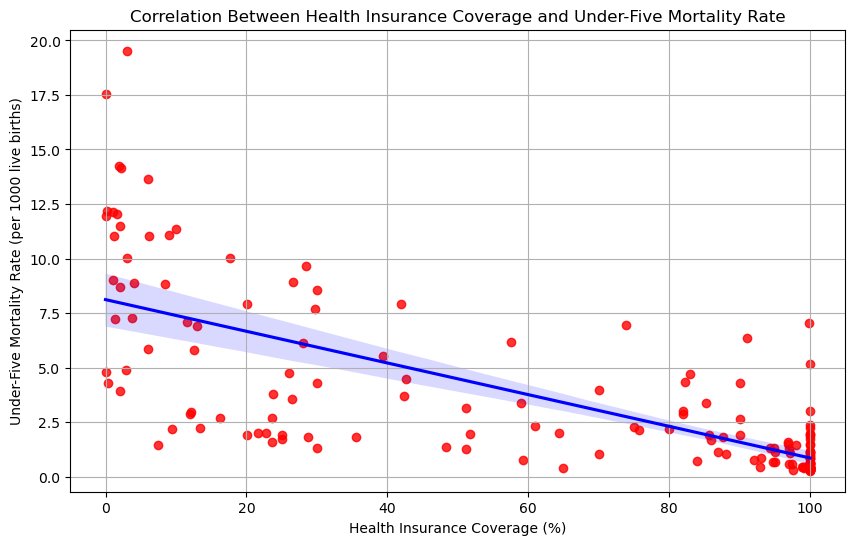

In [61]:
#Scatter plot with a trendline showing the correlation between health insurance coverage and child mortality
plt.figure(figsize=(10, 6))
sns.regplot(x='population_covered_by_health_insurance_ilo_2014', 
            y='u5_mortality_rate_observation_value(deaths_per_100_live_ births)', 
            data=merged_health, 
            scatter_kws={'color': 'red'}, 
            line_kws={'color': 'blue'})
plt.title('Correlation Between Health Insurance Coverage and Under-Five Mortality Rate')
plt.xlabel('Health Insurance Coverage (%)')
plt.ylabel('Under-Five Mortality Rate (per 1000 live births)')
plt.grid(True)
plt.show()


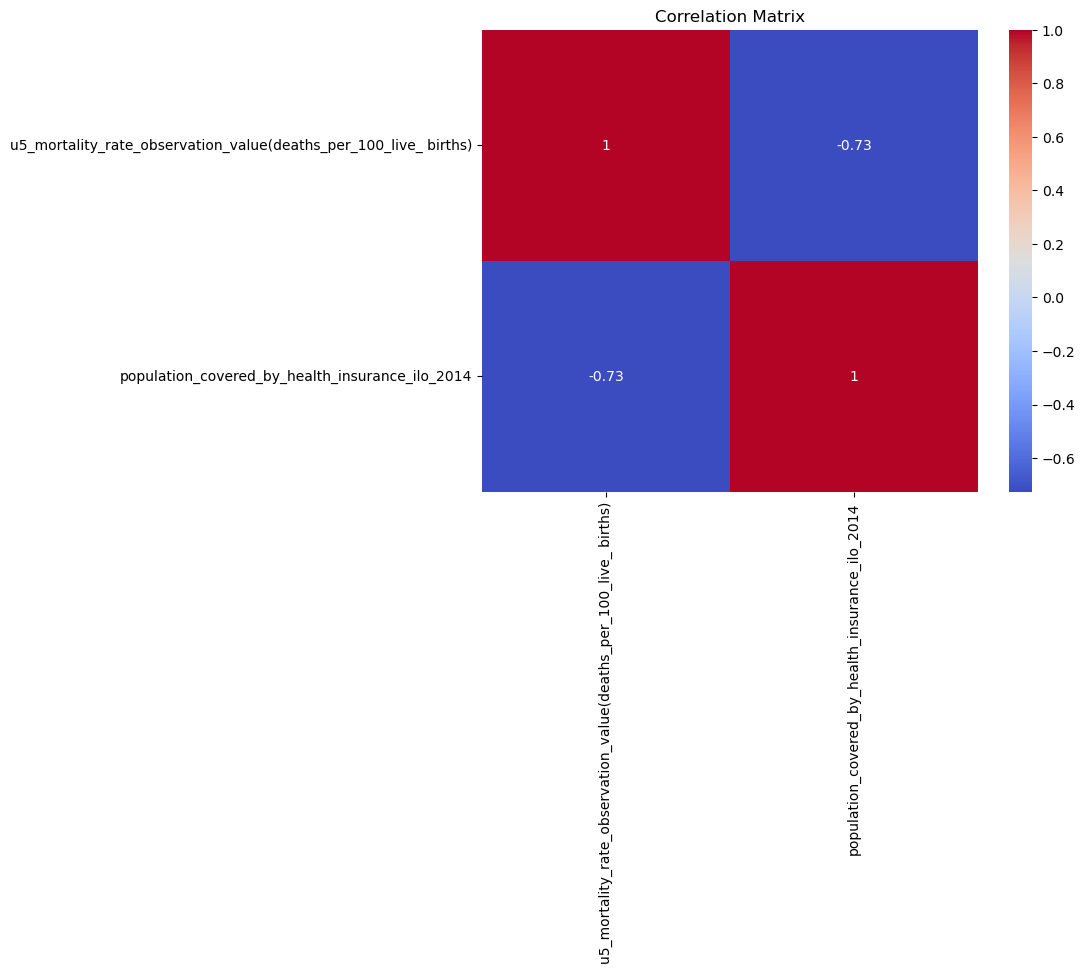

In [62]:
# Calculate correlation matrix for all numerical columns 
correlation_matrix = merged_health[['u5_mortality_rate_observation_value(deaths_per_100_live_ births)', 'population_covered_by_health_insurance_ilo_2014']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [63]:
# There is a strong negative correlation (-0.73) between health insurance coverage and child mortality rates.
# Countries with low health protection coverage have significantly higher under-five mortality rates.
# While countries with higher health insurance coverage have lower child mortality rates.
# Actionable Insight: Improve health insurance coverage in low-income communities to reduce child mortality.

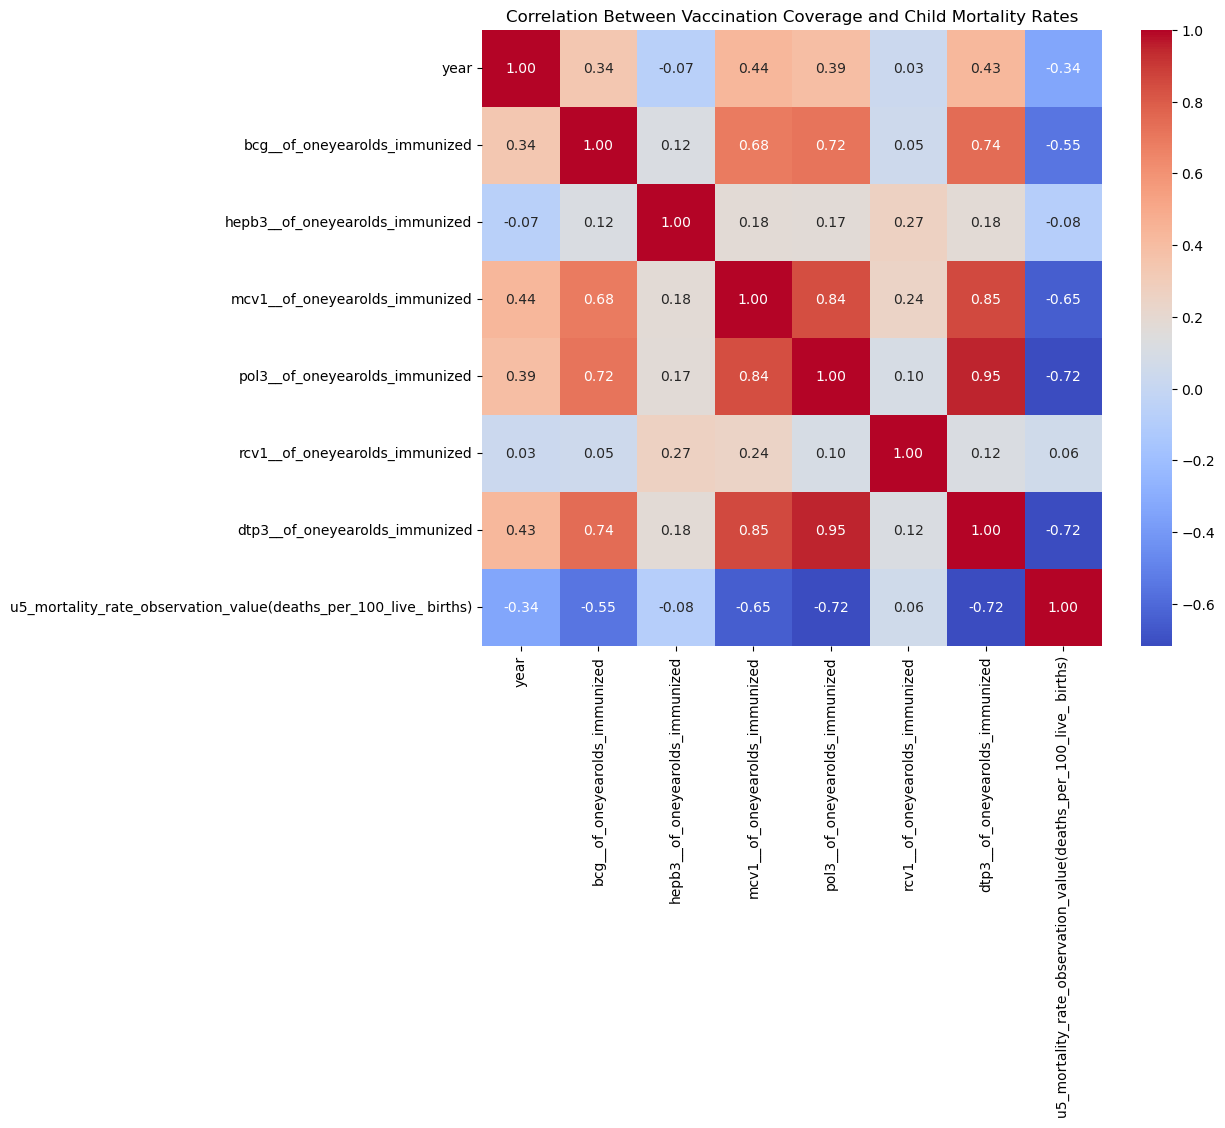

In [64]:
# 2a11. Analyze vaccination rates (BCG, HepB3, DTP3, etc.) and compare them with child and infant mortality rates.

# Calculate average vaccination rates for each country and year
avg_vaccination = vaccination_coverage.groupby(['entity', 'year']).mean().reset_index()

# Merge vaccination data with child mortality data
merged_data = pd.merge(avg_vaccination, country_income_child_mortality, on=['entity', 'year'])

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Vaccination Coverage and Child Mortality Rates')
plt.show()

# Key Findings in the heatmap of Correlation Between Vaccination Coverage and Child Mortality Rates
Many vaccination rates (like BCG, Polio, and DTP3) show a strong negative correlation with child mortality rates:
For example, DTP3 has a correlation of -0.72 with child mortality. This means that as DTP3 vaccination coverage increases, 
child mortality decreases significantly. Some vaccines like HepB3 and RCV1 have a weaker correlation with child mortality,
indicating they might not have a direct impact on overall child mortality.This revealed that higher vaccination coverage (e.g., BCG, HepB3, DTP3) is associated with lower child mortality rates.
Actionable Insight:Strengthen vaccination programs, particularly in regions with low coverage. and conduct awareness campaigns and mobile vaccination drives in rural areas.

In [65]:
#2b. Determine the relationship between skilled birth attendance and child mortality.

In [66]:
# Merge skill birth attandance data with child mortality data
merged_births = pd.merge(staff_births_attended, country_income_child_mortality, on=['entity', 'year'])

# Analyze correlation
correlation_births = merged_births['health_staff_births_attended(%_of_total)'].corr(
    merged_births['u5_mortality_rate_observation_value(deaths_per_100_live_ births)']
)
print(f"Correlation between skilled birth attendance and child mortality: {correlation_births}")


Correlation between skilled birth attendance and child mortality: -0.816800969859901


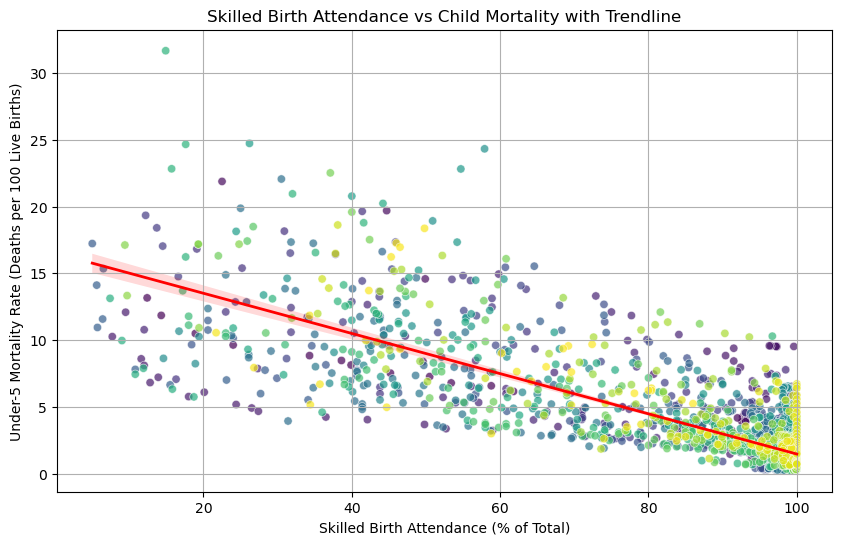

In [67]:
# Scatter plot showing the relationship between skilled birth attendance and child mortality
# Plotting the scatter plot with a trendline
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='health_staff_births_attended(%_of_total)',
    y='u5_mortality_rate_observation_value(deaths_per_100_live_ births)',
    data=merged_births,
    hue='entity',
    palette='viridis',
    alpha=0.7)
sns.regplot(
    x='health_staff_births_attended(%_of_total)',
    y='u5_mortality_rate_observation_value(deaths_per_100_live_ births)',
    data=merged_births,
    scatter=False,  
    color='red',    
    line_kws={"linewidth": 2})
plt.title('Skilled Birth Attendance vs Child Mortality with Trendline')
plt.xlabel('Skilled Birth Attendance (% of Total)')
plt.ylabel('Under-5 Mortality Rate (Deaths per 100 Live Births)')
plt.grid(True)
plt.legend([], [], frameon=False)
plt.show()

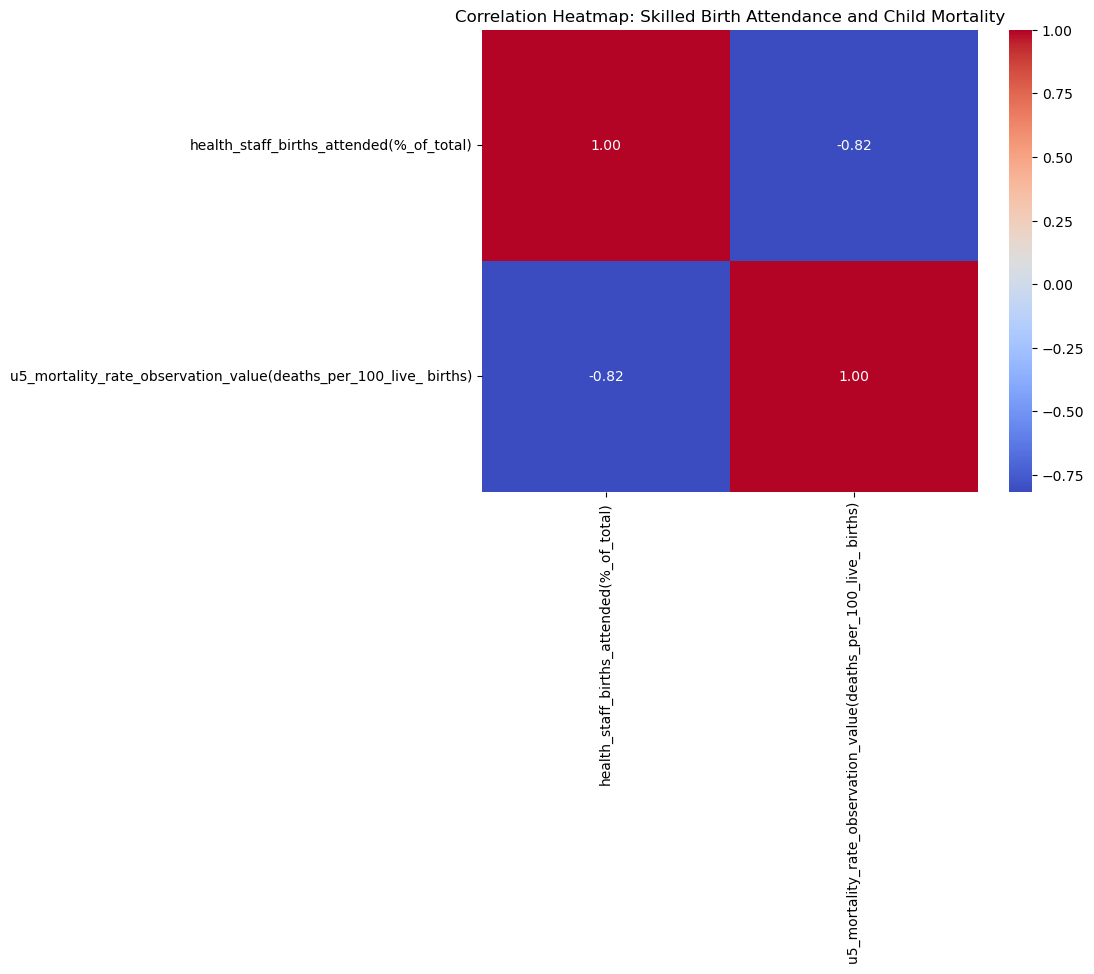

In [68]:
# A heatmap to visualize the correlation matrix
correlation_matrix = merged_births[[
    'health_staff_births_attended(%_of_total)',
    'u5_mortality_rate_observation_value(deaths_per_100_live_ births)'
]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Skilled Birth Attendance and Child Mortality')
plt.show()

Key Findings:
A strong negative correlation (-0.82) exists between skilled birth attendance and child mortality.
Countries with higher rates of births attended by healthcare staff have lower child mortality rates.
Actionable Insight: Increase access to skilled birth attendance by investing in midwife training programs and rural 
healthcare facilities.


In [69]:
# 2c. Investigate if high maternal deaths correlate with higher child mortality rates

In [70]:
# Merge with child mortality data
merged_maternal = pd.merge(region_maternal_deaths, country_income_child_mortality, on=['entity', 'year'])

# Analyze correlation
correlation_maternal = merged_maternal['est_maternal_deaths'].corr(
    merged_maternal['u5_mortality_rate_observation_value(deaths_per_100_live_ births)']
)
print(f"Correlation between maternal deaths and child mortality: {correlation_maternal}")


Correlation between maternal deaths and child mortality: 0.1489833707289429


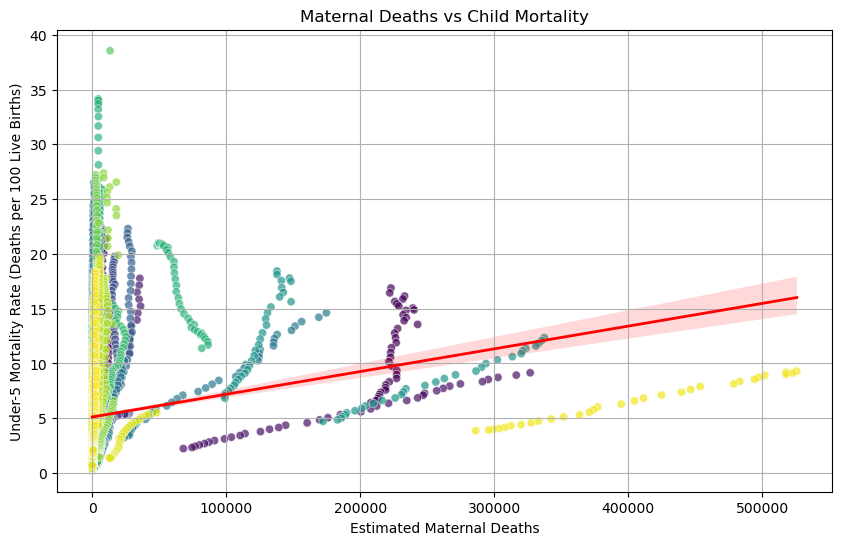

In [71]:
# Scatter plot to show if high maternal death correlate with child mortality
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='est_maternal_deaths',
    y='u5_mortality_rate_observation_value(deaths_per_100_live_ births)',
    data=merged_maternal,
    hue='entity',
    palette='viridis',
    alpha=0.7)
sns.regplot(
    x='est_maternal_deaths',
    y='u5_mortality_rate_observation_value(deaths_per_100_live_ births)',
    data=merged_maternal,
    scatter=False,
    color='red',
    line_kws={"linewidth": 2})
plt.title('Maternal Deaths vs Child Mortality')
plt.xlabel('Estimated Maternal Deaths')
plt.ylabel('Under-5 Mortality Rate (Deaths per 100 Live Births)')
plt.grid(True)
plt.legend([], [],frameon=False)
plt.show()

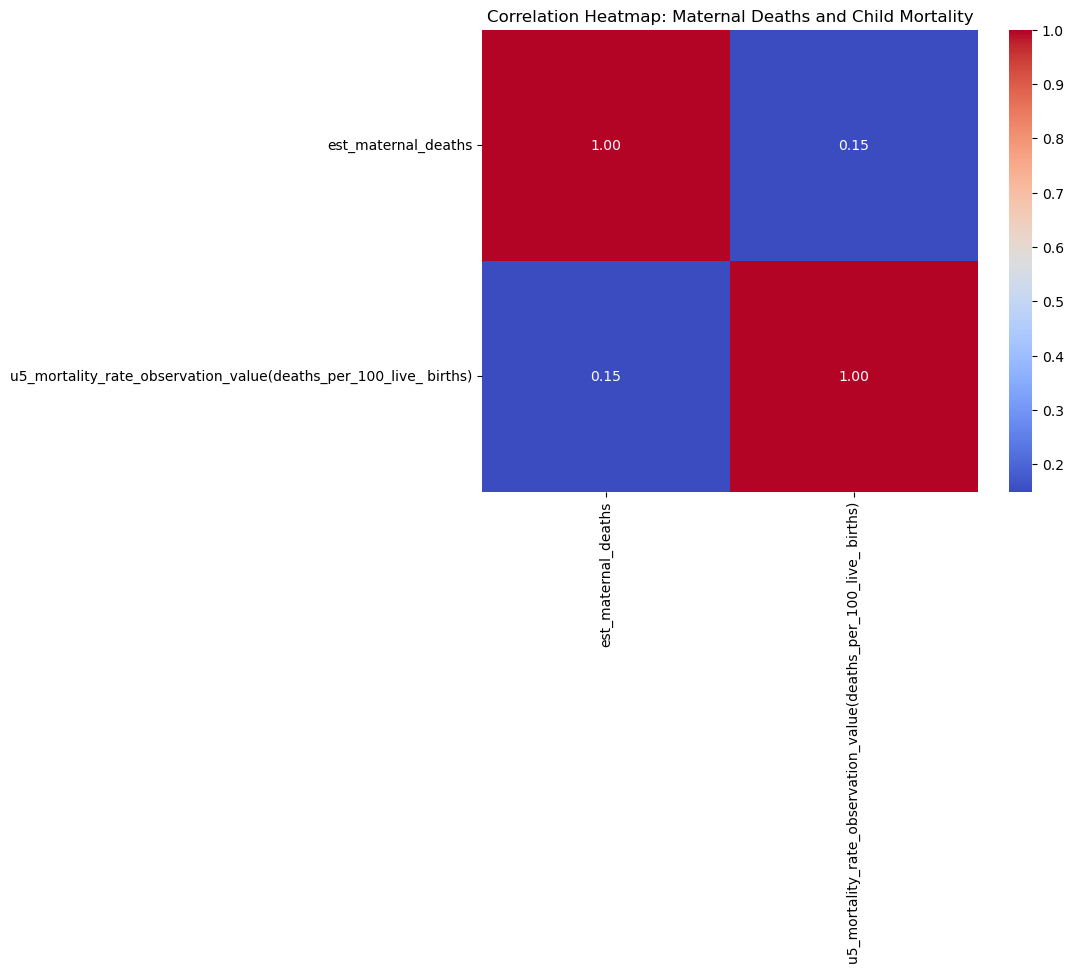

In [72]:
# Heatmap to show correlation matrix
correlation_matrix = merged_maternal[[
    'est_maternal_deaths',
    'u5_mortality_rate_observation_value(deaths_per_100_live_ births)'
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Maternal Deaths and Child Mortality')
plt.show()


In [73]:
# Key Findings
# There is a positive correlation (0.15) between maternal deaths and child mortality rates.
# Actionable Insight: Improve maternal care services to reduce maternal deaths, which will likely reduce child mortality.

In [74]:
# 3a. Causes of Death and Mortality Trends

In [75]:
#Identify the major causes of death among children under five.

# Group by cause and sum the deaths
top_causes = death_causes_distribution.groupby('death_cause')['fact_value_numeric'].sum().sort_values(ascending=False).head(10)
top_causes

death_cause
Prematurity                                                 2105.8813
Congenital anomalies                                        1845.5200
Acute lower respiratory infections                          1177.6671
Birth asphyxia and birth trauma                             1097.4895
Other noncommunicable diseases                               920.5492
Other communicable, perinatal and nutritional conditions     830.7431
Injuries                                                     680.3339
Sepsis and other infectious conditions of the newborn        532.2128
Diarrhoeal diseases                                          509.6652
Malaria                                                      227.3335
Name: fact_value_numeric, dtype: float64

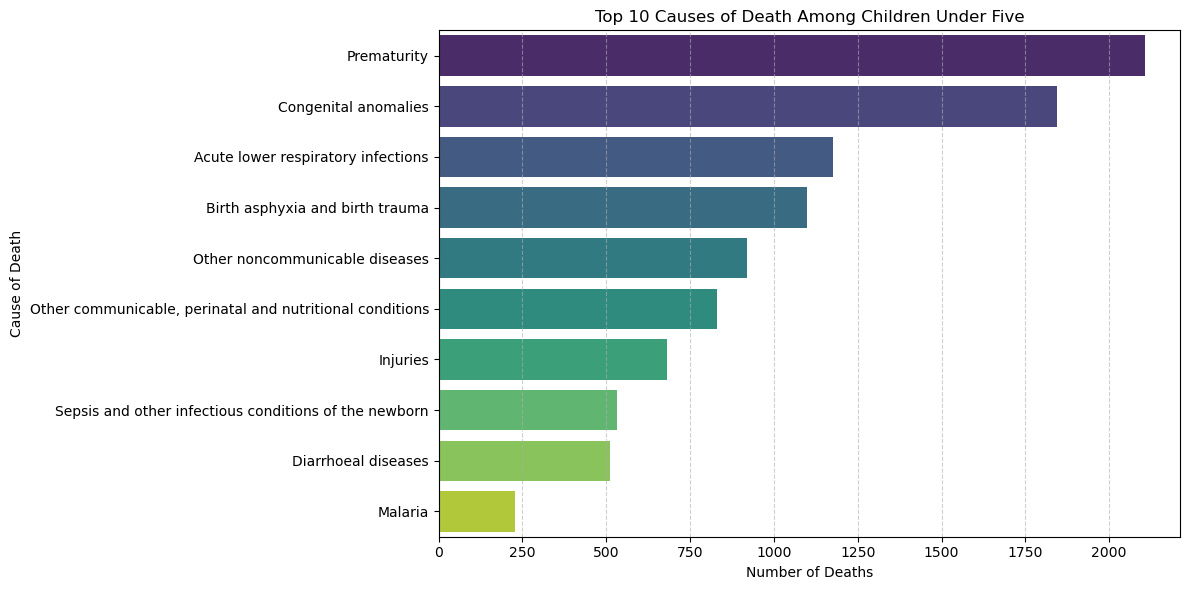

In [76]:
# Plot the top 10 causes of death as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_causes.values,
    y=top_causes.index,
    palette='viridis')
plt.title('Top 10 Causes of Death Among Children Under Five')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [77]:
#Key Findings
#Major causes of death include:Prematurity,Congenital anomalies,Acute lower respiratory infections,Birth asphyxia and birth trauma
#Actionable Insight: Implement targeted interventions to address these primary causes, such as neonatal care, 
#vaccination programs, and maternal education.

In [78]:
# Analyze trends over the years for youth and infant mortality rates.
youth_trend = youth_mortality_rate.groupby('year')['u_15_mortality_rate'].mean()
infant_trend = infant_deaths.groupby('year')['death_sex:all_age0_estimates'].mean()

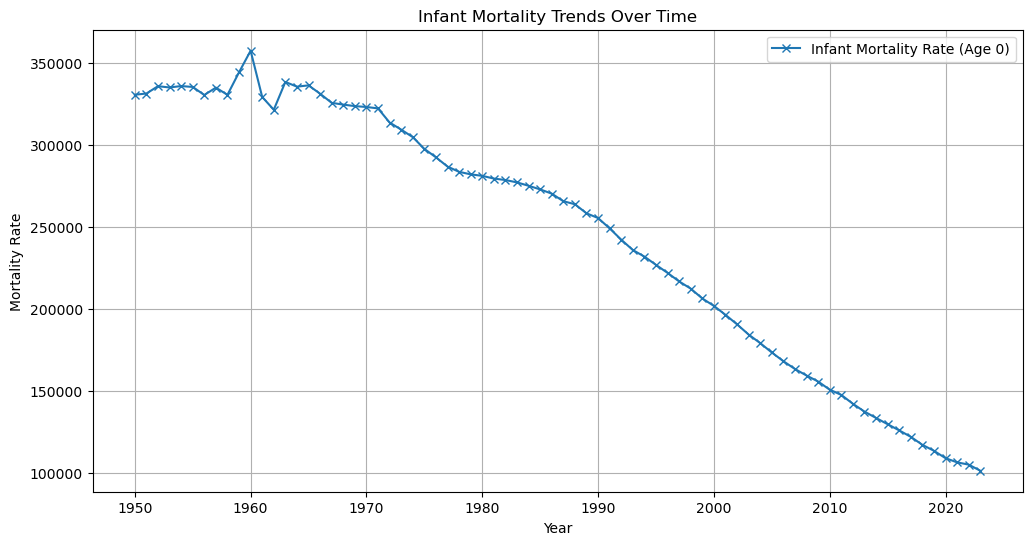

In [79]:
# Plot Infant Mortality Trend
plt.figure(figsize=(12, 6))
plt.plot(infant_trend.index, infant_trend.values, label='Infant Mortality Rate (Age 0)', marker='x')
plt.title('Infant Mortality Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

#Key Insight:
#Infant mortality rates were above 320,000 deaths per year during the 1950s and early 1960s.
#By 2020, infant mortality reached the lowest point, around 100,000 deaths per year.
#The steady decline in infant mortality over the decades is promising, but there is still work to be done.
#By focusing on vaccination, maternal care, socioeconomic improvements, and targeted health interventions, 
#policymakers can aim to further reduce preventable infant deaths in Africa and beyond.

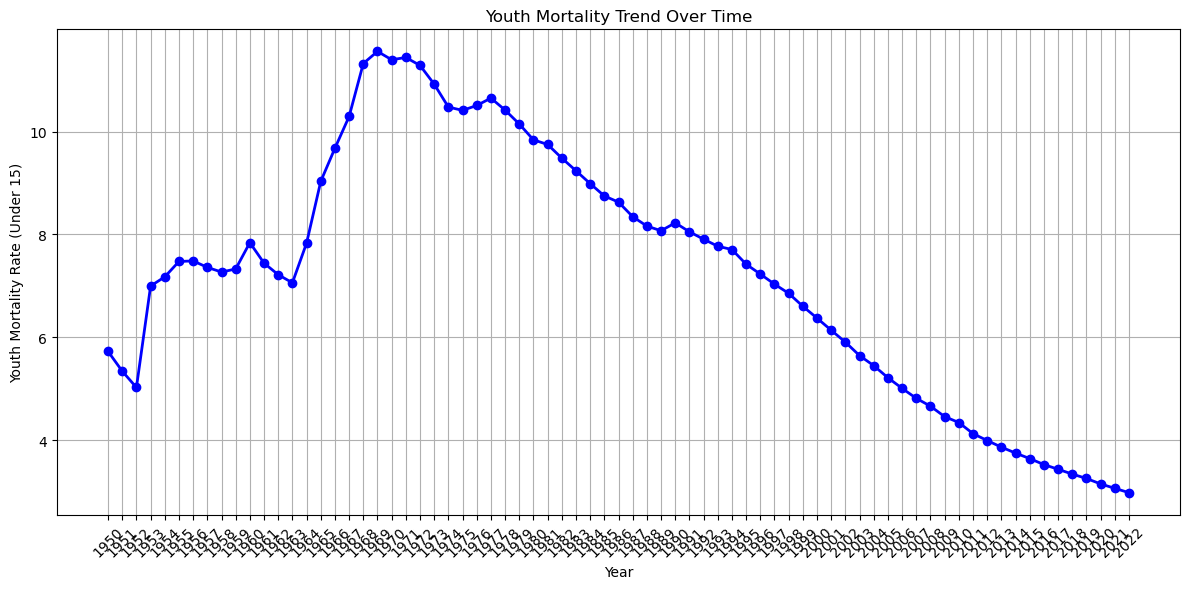

In [80]:
# Youth mortality trend
# Calculate the youth mortality trend
youth_trend = youth_mortality_rate.groupby('year')['u_15_mortality_rate'].mean()

plt.figure(figsize=(12, 6))
plt.plot(youth_trend.index, youth_trend.values, marker='o', linestyle='-', color='blue', linewidth=2)
plt.title('Youth Mortality Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Youth Mortality Rate (Under 15)')
plt.grid(True)
plt.xticks(youth_trend.index, rotation=45)
plt.tight_layout()
# Show the plot
plt.show()


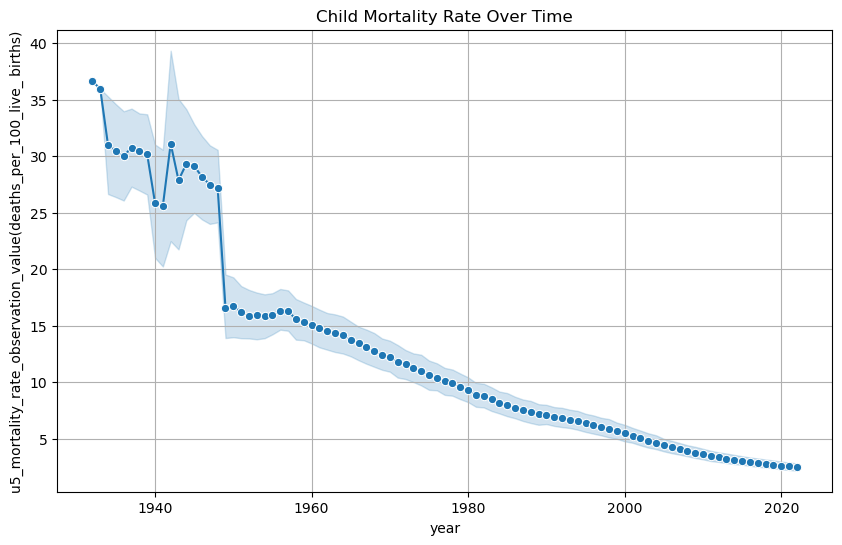

In [81]:
# Child Mortality Rate
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='u5_mortality_rate_observation_value(deaths_per_100_live_ births)', data=country_income_child_mortality, marker='o')
plt.title('Child Mortality Rate Over Time')
plt.xlabel('year')
plt.ylabel('u5_mortality_rate_observation_value(deaths_per_100_live_ births)')
plt.grid(True)
plt.show()

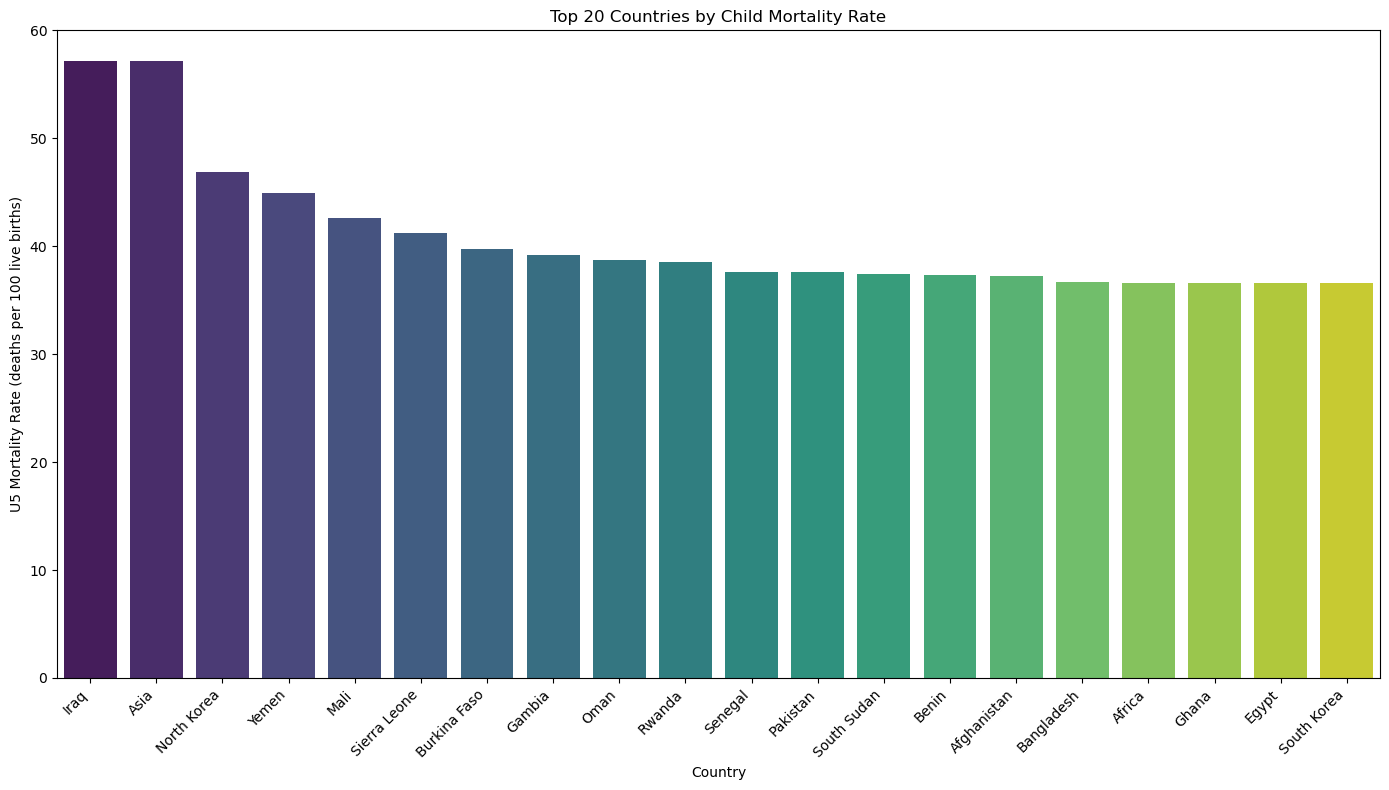

In [82]:
# Sort the data by child mortality rate and select the top 20 distinct countries
top_20_countries = country_income_child_mortality.sort_values(
    by='u5_mortality_rate_observation_value(deaths_per_100_live_ births)',
    ascending=False
).drop_duplicates(subset=['entity']).head(20)

# Plot using seaborn
plt.figure(figsize=(14, 8))  # Increased figure size for better visualization
sns.barplot(
    x='entity',
    y='u5_mortality_rate_observation_value(deaths_per_100_live_ births)',
    data=top_20_countries,
    palette='viridis')
plt.title('Top 20 Countries by Child Mortality Rate')
plt.xlabel('Country')
plt.ylabel('U5 Mortality Rate (deaths per 100 live births)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

In [83]:
youth_mortality_rate.head()

,entity,year,u_15_mortality_rate
0,Afghanistan,1977,30.110573
1,Afghanistan,1978,29.290777
2,Afghanistan,1979,28.479010
3,Afghanistan,1980,27.649078
4,Afghanistan,1981,26.834482


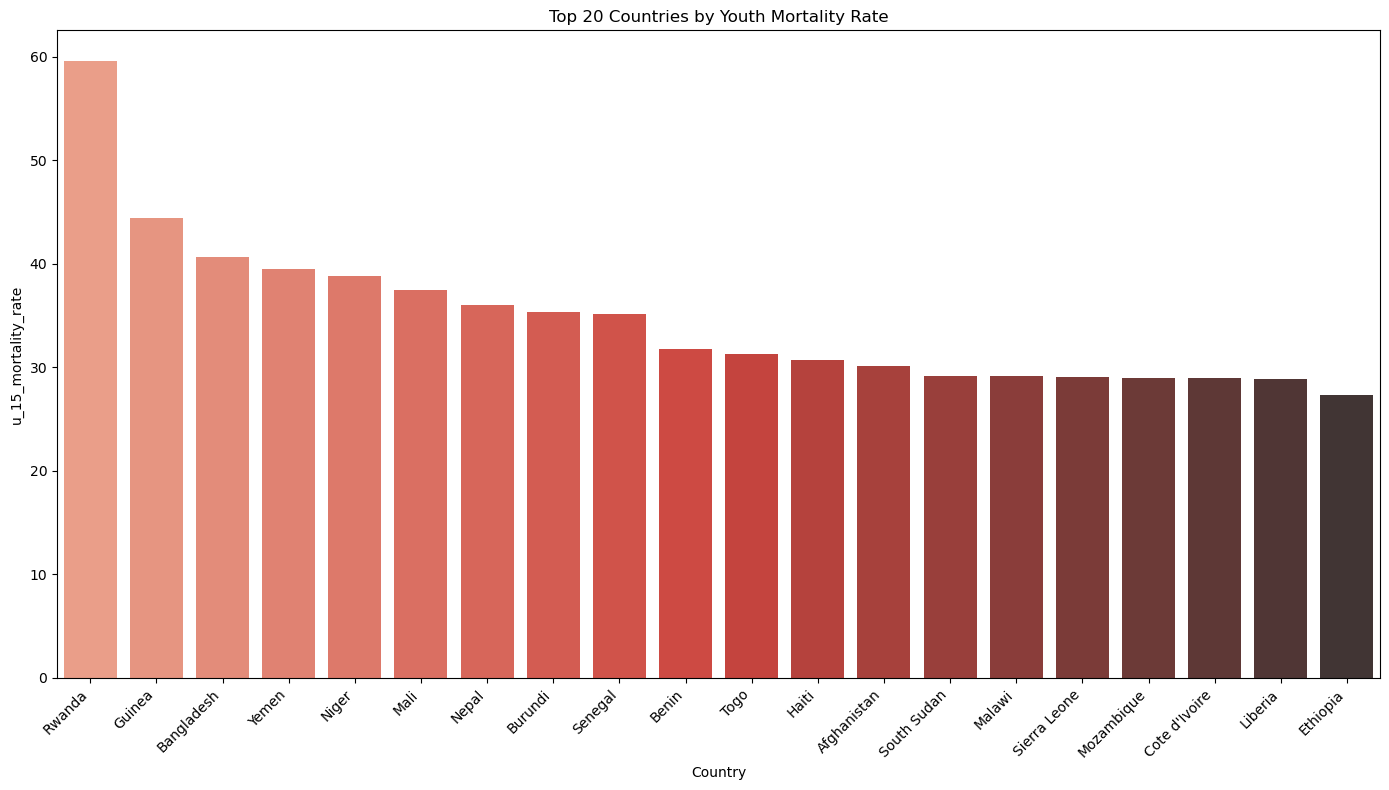

In [84]:
# Countries with high youth mortality rate
# Sort the data by youth mortality rate and select the top 20 distinct countries
top_20_countries = youth_mortality_rate.sort_values(
    by='u_15_mortality_rate',
    ascending=False
).drop_duplicates(subset=['entity']).head(20)


plt.figure(figsize=(14, 8)) 
sns.barplot(
    x='entity',
    y='u_15_mortality_rate',
    data=top_20_countries,
    palette='Reds_d')
plt.title('Top 20 Countries by Youth Mortality Rate')
plt.xlabel('Country')
plt.ylabel('u_15_mortality_rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

In [85]:
health_protection_coverage.head()

,entity,year,population_covered_by_health_insurance_ilo_2014
0,Albania,2008,23.6
1,Algeria,2005,85.2
2,American Samoa,2009,3.0
3,Angola,2010,0.0
4,Antigua and Barbuda,2007,51.1


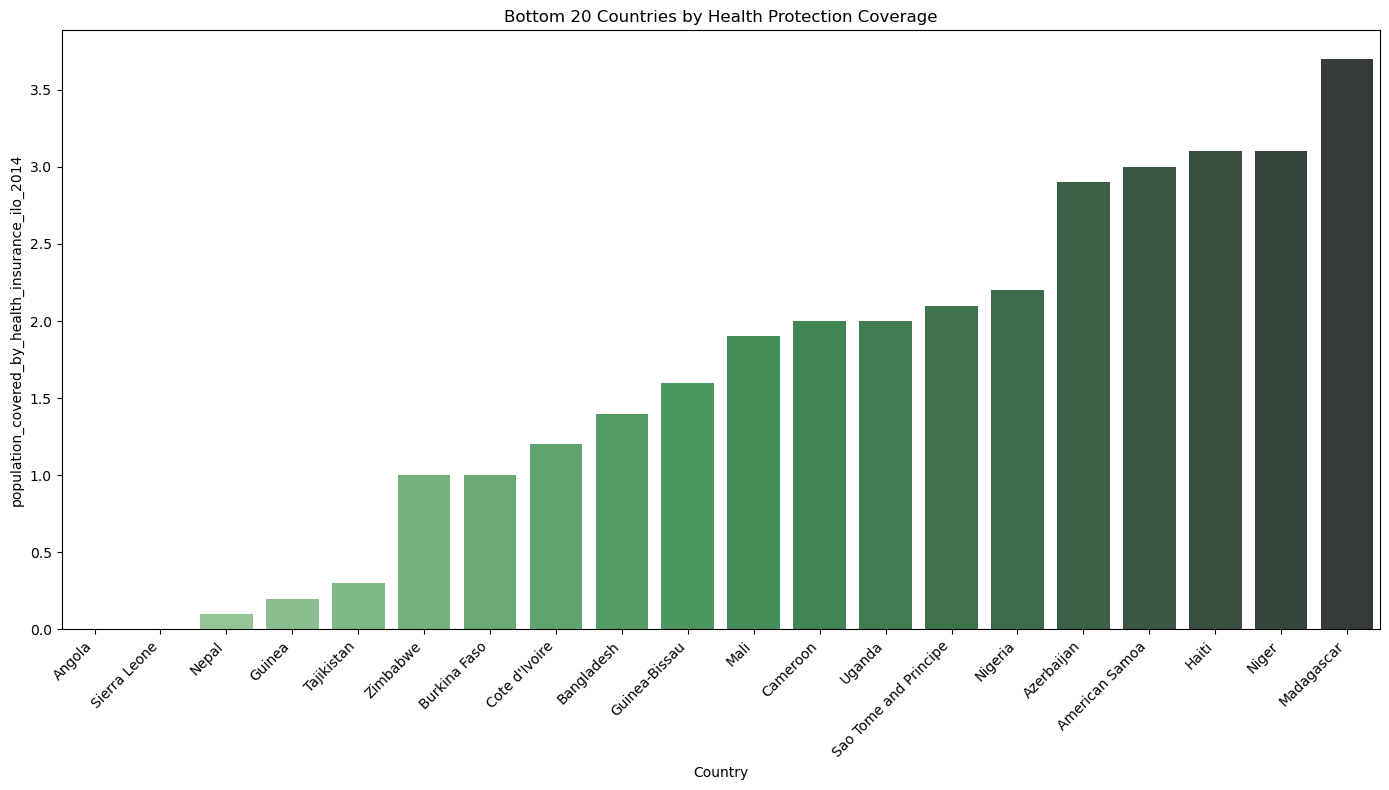

In [86]:
# Countries with low health_protection_coverage
# Sort the data by youth mortality rate and select the top 20 distinct countries
least_20_countries = health_protection_coverage.sort_values(
    by='population_covered_by_health_insurance_ilo_2014',
    ascending=True
).drop_duplicates(subset=['entity']).head(20)


plt.figure(figsize=(14, 8)) 
sns.barplot(
    x='entity',
    y='population_covered_by_health_insurance_ilo_2014',
    data=least_20_countries,
    palette='Greens_d')
plt.title('Bottom 20 Countries by Health Protection Coverage')
plt.xlabel('Country')
plt.ylabel('population_covered_by_health_insurance_ilo_2014')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

# 3. Regional Disparities in Mortality Rates

In [87]:
#Merge infant deaths and death_causes_distribution dataframe to visualise regional infant deaths

# Select only the necessary columns for each dataframe
infant_deaths = infant_deaths[['entity', 'year', 'death_sex:all_age0_estimates']]
death_causes_distribution = death_causes_distribution[['entity', 'year', 'parent_entity','death_cause','fact_value_numeric']]


# Perform inner joins sequentially
merged_data = pd.merge(infant_deaths, death_causes_distribution, on=['entity', 'year'], how='inner')


# Check the merged dataframe
merged_data.head(10)

,entity,year,death_sex:all_age0_estimates,parent_entity,death_cause,fact_value_numeric
0,Afghanistan,2000,94789.0,Eastern Mediterranean,"Other communicable, perinatal and nutritional ...",0.0470
1,Afghanistan,2000,94789.0,Eastern Mediterranean,Congenital anomalies,0.0480
2,Afghanistan,2000,94789.0,Eastern Mediterranean,Other noncommunicable diseases,0.0004
3,Afghanistan,2000,94789.0,Eastern Mediterranean,Injuries,0.0110
4,Afghanistan,2000,94789.0,Eastern Mediterranean,HIV/AIDS,0.0000
5,Afghanistan,2000,94789.0,Eastern Mediterranean,Diarrhoeal diseases,0.0110
6,Afghanistan,2000,94789.0,Eastern Mediterranean,Measles,0.0000
7,Afghanistan,2000,94789.0,Eastern Mediterranean,Meningitis/encephalitis,0.0250
8,Afghanistan,2000,94789.0,Eastern Mediterranean,Malaria,0.0000
9,Afghanistan,2000,94789.0,Eastern Mediterranean,Prematurity,0.0260


In [88]:
# Region with high high infant death

# Group by 'parent_entity' and sum the death estimates
Region_inf_death = merged_data.groupby('parent_entity', as_index=False)['death_sex:all_age0_estimates'].sum()

# Sort by the death estimates in descending order 
Region_inf_death = Region_inf_death.sort_values(
    by='death_sex:all_age0_estimates',
    ascending=False)

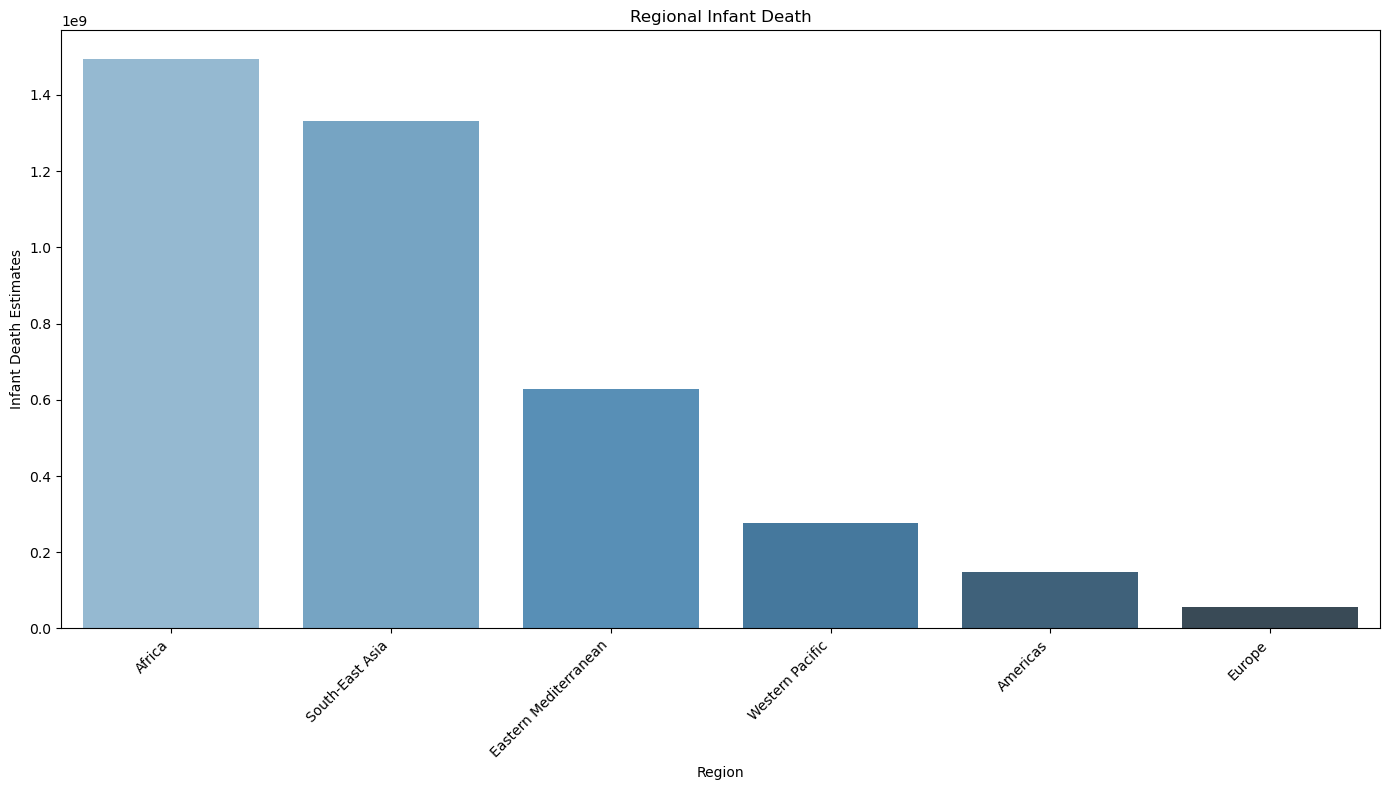

In [89]:
# Bar chart to show Regional infant Deaths
plt.figure(figsize=(14, 8))
sns.barplot(
    x='parent_entity',
    y='death_sex:all_age0_estimates',
    data=Region_inf_death,
    palette='Blues_d')
plt.title('Regional Infant Death')
plt.xlabel('Region')
plt.ylabel('Infant Death Estimates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

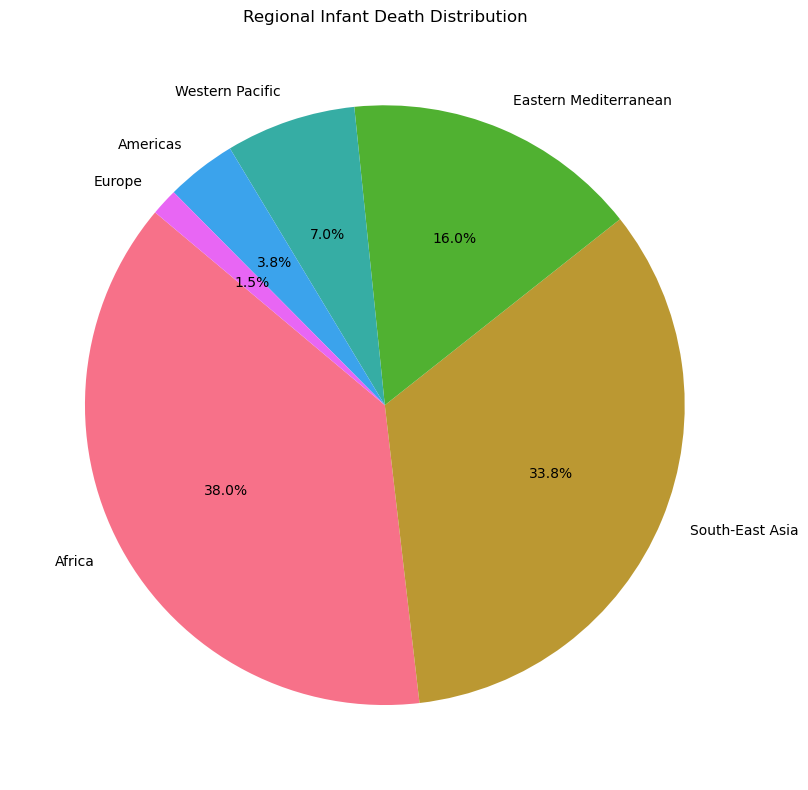

In [90]:
# A pie chart showing Regional infant deaths
plt.figure(figsize=(12, 8))
plt.pie(
    Region_inf_death['death_sex:all_age0_estimates'],
    labels=Region_inf_death['parent_entity'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('husl', len(Region_inf_death)))
plt.title('Regional Infant Death Distribution')
plt.tight_layout()
plt.show()

Key Insight
Regions with the highest infant deaths:Africa,South-East Asia,Eastern Mediterranean
Actionable Insight: Prioritize investments in healthcare infrastructure in these regions and Collaborate with 
international organizations to fund healthcare initiatives.

# 4.Recommendations

1.Expand Healthcare Access by broadening health insurance coverage to reach rural and low-income areas.Also,increasing
 funding for maternal care services to reduce mortality rates for mothers and children.
2. Boost Vaccination Programs though improving immunization rates for essential vaccines like BCG, DTP3, and HepB3 and 
  organising community-driven vaccination campaigns and awareness programs.
3.Promote Skilled Birth Attendance by training more midwives and health workers for rural communities.Offer incentives 
    to healthcare providers to serve in remote and underserved regions.
4. Target Major Causes of Child Death via investing in neonatal care to prevent deaths from premature birth and birth 
   injuries.Developing community health initiatives to reduce respiratory infections and diarrheal diseases can also help.

# 5. Conclusion

This project highlights key drivers of child and infant mortality in African countries. 
Improving healthcare access, expanding vaccination programs, and enhancing maternal care can significantly 
lower mortality rates. Policymakers should adopt these targeted strategies to ensure better health outcomes for children.